#### Fraud Detection

#### Data Dectionary
##### Step = Maps a unit of time in the real world. In this case 1 step is 1 hour of time.
##### type = CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER
##### amount = amount of the transaction in local currency
##### nameOrig = customer who started the transaction
##### oldbalanceOrg = initial balance before the transaction
##### newbalanceOrig = customer's balance after the transaction.
##### nameDest = recipient ID of the transaction.
##### oldbalanceDest = initial recipient balance before the transaction.
##### newbalanceDest = recipient's balance after the transaction.
##### isFraud = identifies a fraudulent transaction (1) and non fraudulent (0)
##### isFlaggedFraud = Indicates whether a transaction was flagged as suspicious but not necessarily fraudulent.

In [3]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('PS_20174392719_1491204439457_log.csv')

# New Section

In [5]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.00,0.00,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.00,0.00,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
233387,14,PAYMENT,22222.69,C1925997510,11637.0,0.00,M115907735,0.00,0.00,0.0,0.0
233388,14,CASH_OUT,301902.82,C1773769722,724.0,0.00,C1490065895,411143.00,713045.82,0.0,0.0
233389,14,CASH_OUT,256081.64,C1492972627,70186.0,0.00,C952280731,671070.54,1226271.93,0.0,0.0
233390,14,PAYMENT,15925.87,C1237286617,0.0,0.00,M191975261,0.00,0.00,0.0,0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233392 entries, 0 to 233391
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            233392 non-null  int64  
 1   type            233392 non-null  object 
 2   amount          233392 non-null  float64
 3   nameOrig        233392 non-null  object 
 4   oldbalanceOrg   233392 non-null  float64
 5   newbalanceOrig  233391 non-null  float64
 6   nameDest        233391 non-null  object 
 7   oldbalanceDest  233391 non-null  float64
 8   newbalanceDest  233391 non-null  float64
 9   isFraud         233391 non-null  float64
 10  isFlaggedFraud  233391 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 19.6+ MB


In [7]:
df['isFraud'].value_counts()

,count
isFraud,
0.0,233234
1.0,157


In [8]:
df['isFlaggedFraud'].value_counts()

,count
isFlaggedFraud,
0.0,233391


In [9]:
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,1
nameDest,1
oldbalanceDest,1
newbalanceDest,1
isFraud,1


In [10]:
df.rename(columns={'newbalanceOrig':'newbalanceOrg'},inplace=True)

In [11]:
df.drop(labels=['nameOrig','nameDest'],axis=1,inplace=True)

In [12]:
df.columns

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrg',
       'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud'],
      dtype='object')

In [13]:
df.max()

,0
step,14
type,TRANSFER
amount,10000000.0
oldbalanceOrg,38939424.03
newbalanceOrg,38946233.02
oldbalanceDest,39049895.25
newbalanceDest,39853964.63
isFraud,1.0
isFlaggedFraud,0.0


In [14]:
df.min()

,0
step,1
type,CASH_IN
amount,0.3
oldbalanceOrg,0.0
newbalanceOrg,0.0
oldbalanceDest,0.0
newbalanceDest,0.0
isFraud,0.0
isFlaggedFraud,0.0


In [15]:
df

,step,type,amount,oldbalanceOrg,newbalanceOrg,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.00,0.00,0.0,0.0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.00,0.00,0.0,0.0
2,1,TRANSFER,181.00,181.0,0.00,0.00,0.00,1.0,0.0
3,1,CASH_OUT,181.00,181.0,0.00,21182.00,0.00,1.0,0.0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...
233387,14,PAYMENT,22222.69,11637.0,0.00,0.00,0.00,0.0,0.0
233388,14,CASH_OUT,301902.82,724.0,0.00,411143.00,713045.82,0.0,0.0
233389,14,CASH_OUT,256081.64,70186.0,0.00,671070.54,1226271.93,0.0,0.0
233390,14,PAYMENT,15925.87,0.0,0.00,0.00,0.00,0.0,0.0


### EDA (Data Analysis)

<Axes: title={'center': 'Total amount per transaction type'}, xlabel='Type of Transaction', ylabel='Amount'>

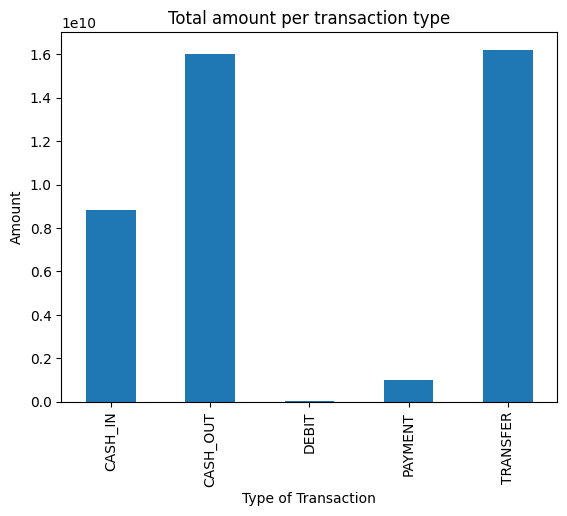

In [16]:
df.groupby('type')['amount'].sum().plot(kind='bar', title="Total amount per transaction type", xlabel='Type of Transaction', ylabel='Amount')

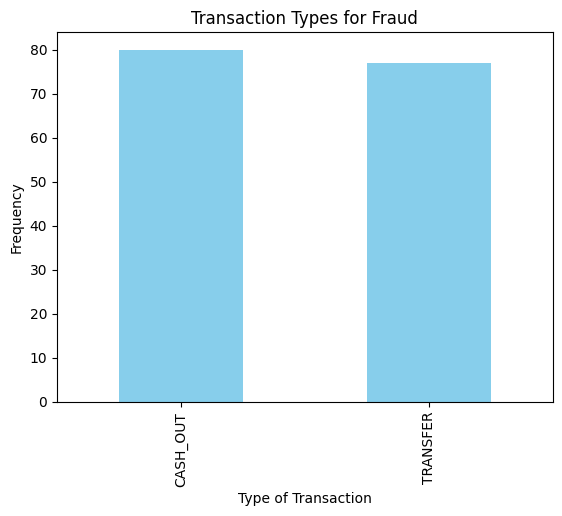

In [17]:
#Fraud by Transaction Type
fraud_types = df.loc[df.isFraud == 1].type.value_counts()
fraud_types.plot(kind='bar',color='skyblue', title="Transaction Types for Fraud", xlabel='Type of Transaction', ylabel='Frequency')
plt.show()

##### TRANSFER and CASH_OUT are two most used mode of transaction and we can see that TRANSFER and CASH_OUT are also the only way in which fraud happen.

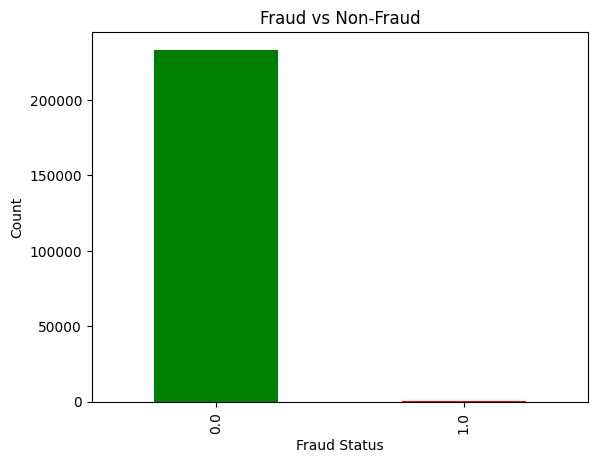

In [18]:
# count of froud status
df['isFraud'].value_counts().plot(kind='bar',color=['green','red'],title='Fraud vs Non-Fraud')
plt.xlabel('Fraud Status')
plt.ylabel('Count')
plt.show()

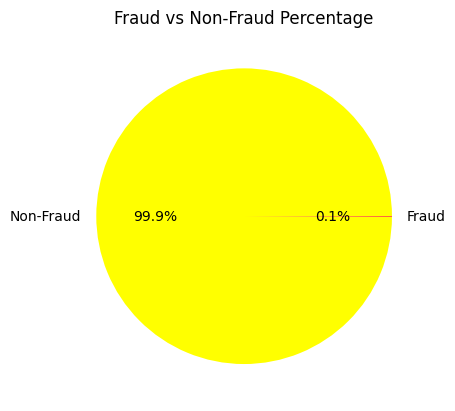

In [19]:
# Calculate the percentage of fraud and non-fraud transactions
fraud_percentage = df['isFraud'].value_counts(normalize=True) * 100
fraud_percentage.plot(kind='pie', labels=['Non-Fraud', 'Fraud'], autopct='%1.1f%%', colors=['yellow', 'red'], title='Fraud vs Non-Fraud Percentage')
plt.ylabel('')
plt.show()


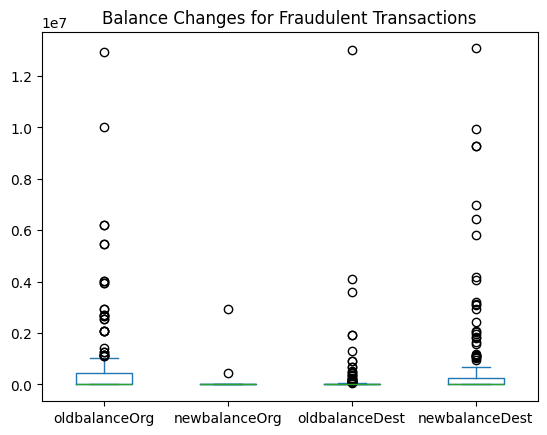

In [20]:
# changes in balances
fraud_balance_change = df[df['isFraud'] == 1][['oldbalanceOrg', 'newbalanceOrg', 'oldbalanceDest', 'newbalanceDest']]
fraud_balance_change.plot(kind='box', title="Balance Changes for Fraudulent Transactions")
plt.show()

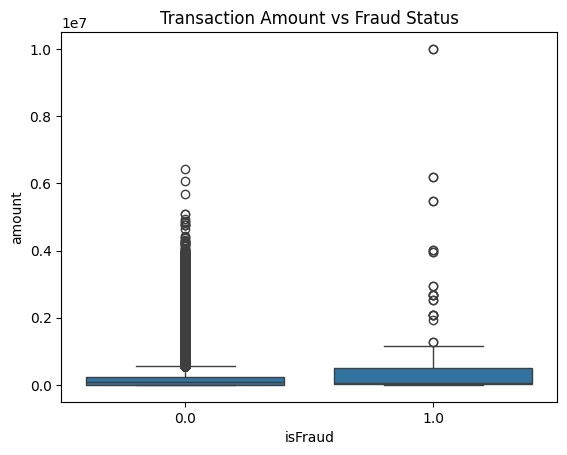

In [21]:
sns.boxplot(x='isFraud', y='amount', data=df)
plt.title('Transaction Amount vs Fraud Status')
plt.show()


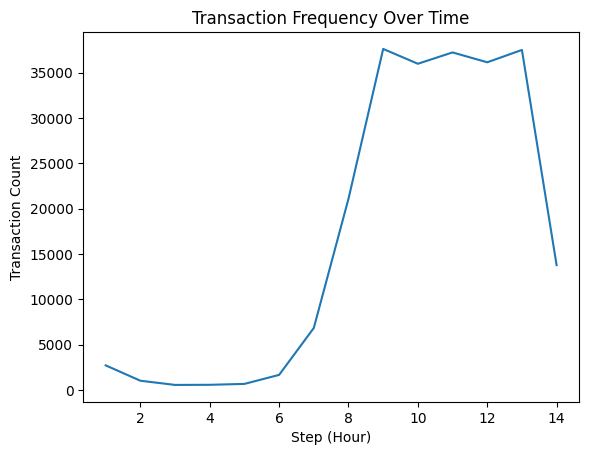

In [22]:
# frequency of transaction
df['step'].value_counts().sort_index().plot(kind='line', title="Transaction Frequency Over Time")
plt.xlabel('Step (Hour)')
plt.ylabel('Transaction Count')
plt.show()

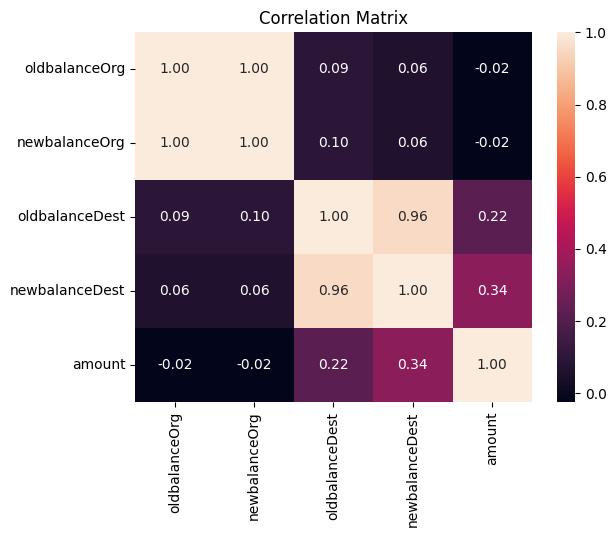

In [23]:
# correlation between balance and amount
correlation = df[['oldbalanceOrg', 'newbalanceOrg', 'oldbalanceDest', 'newbalanceDest', 'amount']].corr()
sns.heatmap(correlation, annot=True,fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [24]:
# Feature Engineering

In [25]:
df['balance_diff_org'] = df['oldbalanceOrg'] - df['newbalanceOrg']
df['balance_diff_dest'] = df['oldbalanceDest'] - df['newbalanceDest']

In [26]:
# Drop the original features after creating derived ones
df = df.drop(['oldbalanceOrg', 'newbalanceOrg', 'oldbalanceDest', 'newbalanceDest'], axis=1)

In [27]:
df

,step,type,amount,isFraud,isFlaggedFraud,balance_diff_org,balance_diff_dest
0,1,PAYMENT,9839.64,0.0,0.0,9839.64,0.00
1,1,PAYMENT,1864.28,0.0,0.0,1864.28,0.00
2,1,TRANSFER,181.00,1.0,0.0,181.00,0.00
3,1,CASH_OUT,181.00,1.0,0.0,181.00,21182.00
4,1,PAYMENT,11668.14,0.0,0.0,11668.14,0.00
...,...,...,...,...,...,...,...
233387,14,PAYMENT,22222.69,0.0,0.0,11637.00,0.00
233388,14,CASH_OUT,301902.82,0.0,0.0,724.00,-301902.82
233389,14,CASH_OUT,256081.64,0.0,0.0,70186.00,-555201.39
233390,14,PAYMENT,15925.87,0.0,0.0,0.00,0.00


In [28]:
df = pd.get_dummies(df, columns=['type'], drop_first=True)

In [29]:
df

,step,amount,isFraud,isFlaggedFraud,balance_diff_org,balance_diff_dest,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,0.0,0.0,9839.64,0.00,False,False,True,False
1,1,1864.28,0.0,0.0,1864.28,0.00,False,False,True,False
2,1,181.00,1.0,0.0,181.00,0.00,False,False,False,True
3,1,181.00,1.0,0.0,181.00,21182.00,True,False,False,False
4,1,11668.14,0.0,0.0,11668.14,0.00,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...
233387,14,22222.69,0.0,0.0,11637.00,0.00,False,False,True,False
233388,14,301902.82,0.0,0.0,724.00,-301902.82,True,False,False,False
233389,14,256081.64,0.0,0.0,70186.00,-555201.39,True,False,False,False
233390,14,15925.87,0.0,0.0,0.00,0.00,False,False,True,False


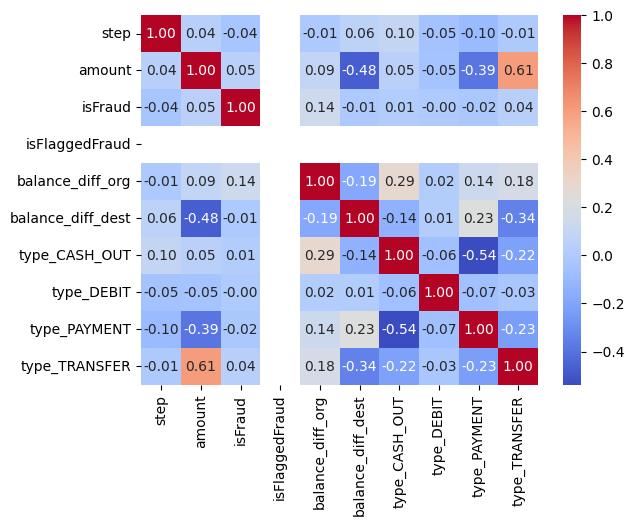

In [30]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f'); plt.show()

### Model Building

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import GridSearchCV

# Assuming 'data' is your dataset and 'IsFraud' is the target variable
X = df.drop(columns=['isFraud','isFlaggedFraud'])
y = df['isFraud']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
iso_forest = IsolationForest(random_state=42)

# Set up a parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_samples': ['auto', 0.5, 0.8],
    'contamination': [0.01, 0.05, 0.1],
    'max_features': [0.8, 1.0],
    'bootstrap': [True, False]
 }

# # Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(iso_forest, param_grid, cv=3, scoring='roc_auc')
grid_search.fit(X_train)

# # Get the best parameters
print(f"Best parameters: {grid_search.best_params_}")
X_train = pd.DataFrame(X_train, columns=['step', 'amount', 'balance_diff_org',
       'balance_diff_dest', 'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT',
       'type_TRANSFER'])  # Ensure column names are intact


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 947, in _score
    scores = scorer(estimator, X_test, **score_params)
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 947, in _score
    scores = scorer(estimator, X_test, **score_params)
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.

Best parameters: {'bootstrap': True, 'contamination': 0.01, 'max_features': 0.8, 'max_samples': 'auto', 'n_estimators': 100}
